Raúl Correa Ocañas

A01722401

01 - 03 - 2024

# Parte I

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [2]:
aldrin = pd.read_csv(r'C:\Users\Raul\OneDrive\Escritorio\CS\TC2004B.101\data\aldrin.csv')

In [3]:
aldrin.head()

,aldrin,depth
0,3.8,bottom
1,4.8,bottom
2,4.9,bottom
3,5.3,bottom
4,5.4,bottom


In [4]:
bottom = aldrin[aldrin['depth'] == 'bottom']['aldrin']
middle = aldrin[aldrin['depth'] == 'middepth']['aldrin']
surface = aldrin[aldrin['depth'] == 'surface']['aldrin']

In [5]:
model = ols('aldrin ~ C(depth)', aldrin).fit()
anova = sm.stats.anova_lm(model, typ=2)
display(anova)

,sum_sq,df,F,PR(>F)
C(depth),16.960667,2.0,6.13381,0.006367
Residual,37.329000,27.0,NaN,NaN


In [6]:
# Perform one-way ANOVA
f_statistic, p_value = (6.13381, 0.006367)

# Set the significance level (alpha)
alpha = 0.05

# Compare p-value to alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean test scores.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean test scores.")

# Display the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

Reject the null hypothesis. There is a significant difference in the mean test scores.
F-statistic: 6.13381
P-value: 0.006367


In [7]:
means = aldrin.groupby('depth').mean().T
counts = aldrin.groupby('depth').count().T

display(
    means,
    counts
)

depth,bottom,middepth,surface
aldrin,6.04,5.05,4.2


depth,bottom,middepth,surface
aldrin,10,10,10


In [8]:
def zt_test(df1, df2):
    diff = df1.mean() - df2.mean()
    # print(df1.mean(),df2.mean())
    mse = 37.329000/27
    test = diff / np.sqrt(mse/len(df1) + mse/len(df2))
    # print(len(df1), len(df2))
    return test

In [9]:
# ¿Existe una diferencia entre la concentración promedio de aldrín en el fondo y a media profundidad?
t_stat = zt_test(bottom, middle)

p_value = 2 * (1-stats.t.cdf(t_stat, df=27))

# Bonferroni correction
if p_value < alpha/3:
    print("Reject the null hypothesis. There is a significant difference in the mean test scores.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean test scores.")

Fail to reject the null hypothesis. There is no significant difference in the mean test scores.


In [10]:
# ¿Existe una diferencia entre la concentración promedio de aldrín en el fondo y en la superficie?
t_stat = zt_test(bottom, surface)

p_value = 2 * (1-stats.t.cdf(t_stat, df=27))

if p_value < alpha/3:
    print("Reject the null hypothesis. There is a significant difference in the mean test scores.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean test scores.")

Reject the null hypothesis. There is a significant difference in the mean test scores.


Se llega a la conclusión de que la diferencia entre la concentración de aldrina media en la superficie y la concentracion de aldrina media en el fondo del río es estadísticamente signficativa, por lo cual se infiere que existe suficiente evidencia para rechazar la hipótesis nula. La hipotésis alternativa indica que, estadísticamente, se espera que la concentración en la superficie sea distinta de la encontrada en el fondo.

Por otro lado, no se puede decir lo mismo para las concentraciones del fondo y medio del rio. No existe evidencia para rechazar la hipotesis nula, y por lo tanto podemos inferir que no se tiene evidencia para indicar que las concentraciones son distintas.

# Parte II.
## Peso vs Volumen

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Create DataFrame with the provided data
data = pd.DataFrame({
    'Weight': [800, 950, 1050, 350, 750, 600, 1075, 250, 700, 650, 975, 350, 950, 425, 725],
    'Volume': [885, 1016, 1125, 239, 701, 641, 1228, 412, 953, 929, 1492, 419, 1010, 595, 1034],
    'Cover': ["hc","hc","hc","hc","hc","hc","hc","hc","pb","pb","pb","pb","pb","pb","pb"]
})

# Add constant to the independent variable (X)
X = sm.add_constant(data['Volume'])

# Fit linear regression model
model = sm.OLS(data['Weight'], X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     52.87
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           6.26e-06
Time:                        13:24:34   Log-Likelihood:                -92.508
No. Observations:                  15   AIC:                             189.0
Df Residuals:                      13   BIC:                             190.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.6793     88.378      1.218      0.2

c:\Users\Raul\miniconda3\envs\ML\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


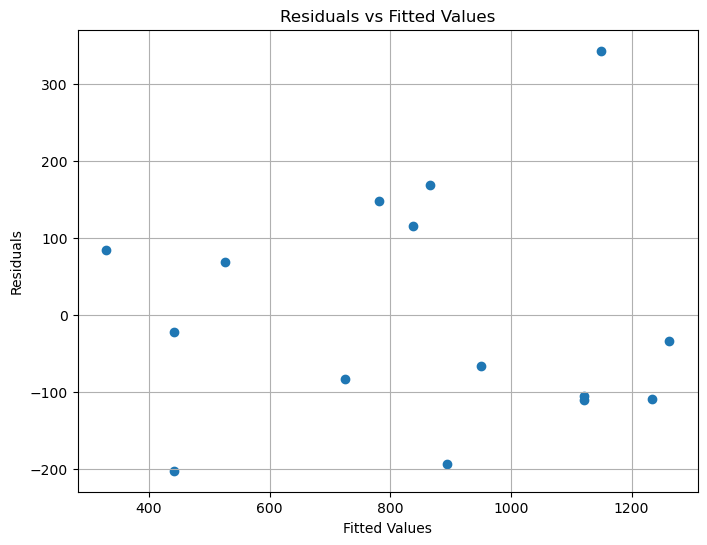

c:\Users\Raul\miniconda3\envs\ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


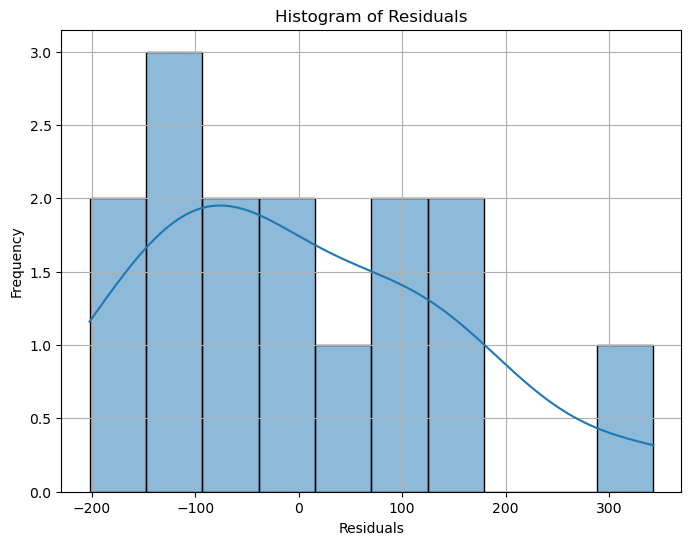

<Figure size 800x600 with 0 Axes>

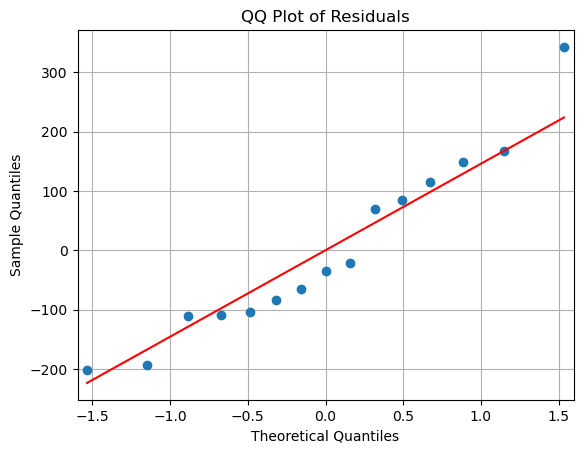

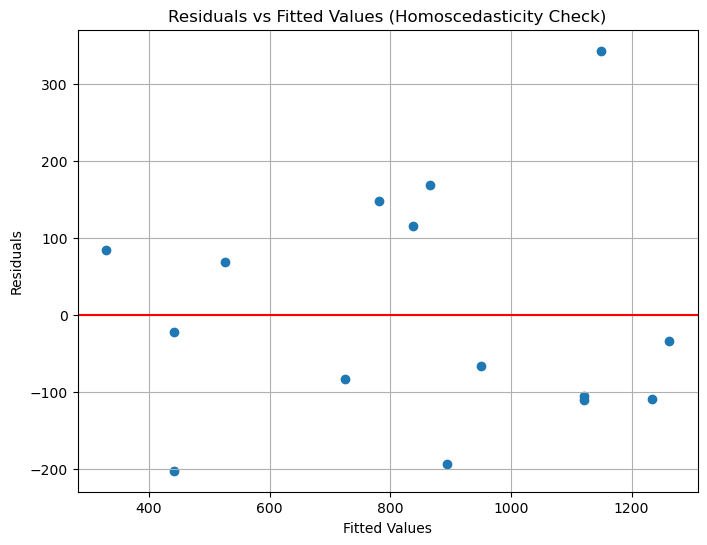

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Fit linear regression model
X = sm.add_constant(data['Weight'])
model = sm.OLS(data['Volume'], X).fit()

# Get residuals
residuals = model.resid

# Plot residuals vs fitted values to check for independence
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=10)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot QQ plot of residuals
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.grid(True)
plt.show()

# Check homoscedasticity using predicted values and residuals
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted Values (Homoscedasticity Check)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = model.resid



# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)

# Print p-value
print("Shapiro-Wilk test p-value:", shapiro_test[1])


Shapiro-Wilk test p-value: 0.383152037858963


Basándonos en la prueba de hipótesis para la significancia global del modelo, planteamos las siguientes hipótesis:

- **Hipótesis nula (H0)**: Todos los coeficientes de regresión son iguales a cero. En otras palabras, el modelo no tiene capacidad predictiva y no es significativo.

- **Hipótesis alternativa (H1)**: Al menos uno de los coeficientes de regresión es diferente de cero. Esto implica que el modelo es significativo y tiene capacidad predictiva.

Dado que el valor p asociado al modelo en general no se proporciona directamente en el resumen del modelo, podemos inferir la significancia global del modelo a partir de la significancia de al menos una de las variables incluidas en él. En este caso, la variable 'Volume' tiene un valor p de prácticamente cero (0.000), lo que indica que al menos una de las variables independientes es significativa en el modelo. Por lo tanto, rechazamos la hipótesis nula y concluimos que el modelo en su conjunto es estadísticamente significativo.

Ahora, en cuanto a los supuestos de los errores:

**NORMALIDAD DE ERRORES**

La prueba Wilk-Shapiro indica que si:
* H0: La distribución es normal
* H1: La distribución no es normal

Entonces si tomamos un alfa de 0.05, nuevamente determinamos que `p_value > 0.05`, y por lo tanto la distribución de los errores es normal.

**INDEPENDENCIA**

Observamos que no hay un patrón claro entre los residuos y los valores predecidos por el modelo, por lo que la "regresión" que se ajusta a estos puntos sería una linea y = 0. Esto implica que se cumple el supuesto de linealidad. Así mismo, la estadística de Durbin-Watson indica que las variables son independientes.

**HOMOCEDASTICIDAD**

Observamos que no hay un patrón claro entre la varianza de los datos con los valores predecidos por el modelo. Esto implica que la varianza es constante y por lo tanto se cumple el supuesto de homocedasticidad.

**LINEALIDAD**
La relación entre variables independientes y variable dependiente muestran una tendencia de línea, por lo que se puede asumir que la relación modelada es lineal.


## Peso vs Volumen y Cubierta

In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

data = pd.get_dummies(data=data, drop_first=True, dtype=float)
# display(data)

# Add constant to the independent variable (X)
X = sm.add_constant(data[['Volume', 'Cover_pb']])

# Fit linear regression model
multilinear_model = sm.OLS(data['Weight'], X).fit()

# Print model summary
print(multilinear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     45.02
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           2.65e-06
Time:                        13:24:36   Log-Likelihood:                -88.625
No. Observations:                  15   AIC:                             183.3
Df Residuals:                      12   BIC:                             185.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.3669     71.765      1.914      0.0

c:\Users\Raul\miniconda3\envs\ML\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


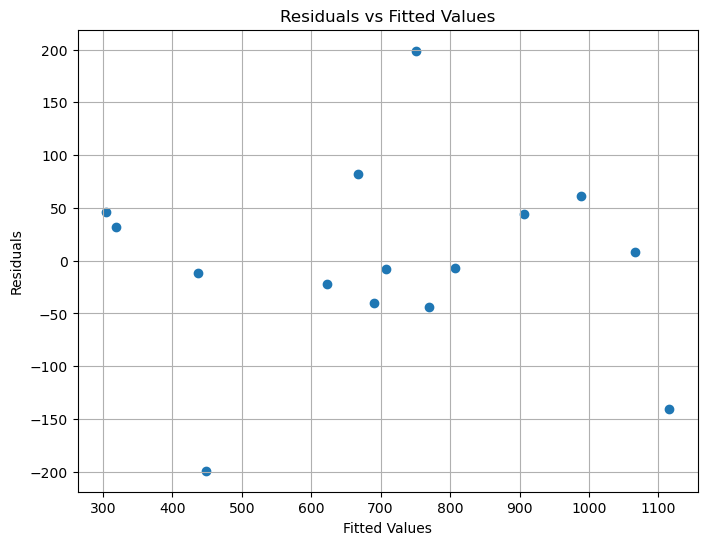

c:\Users\Raul\miniconda3\envs\ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


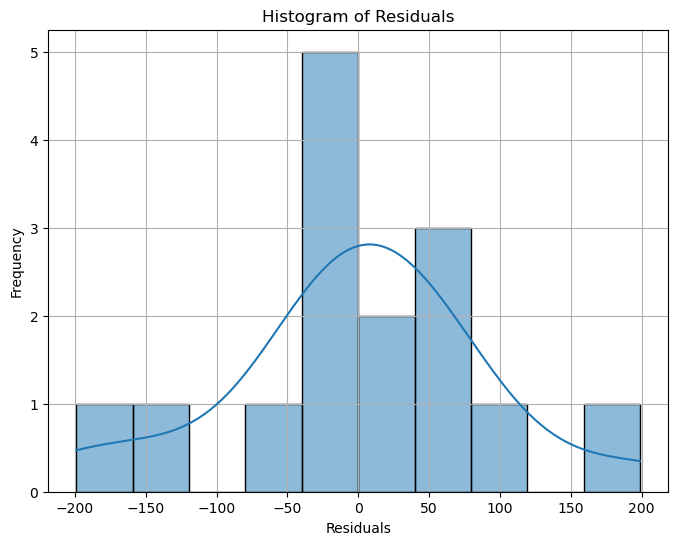

<Figure size 800x600 with 0 Axes>

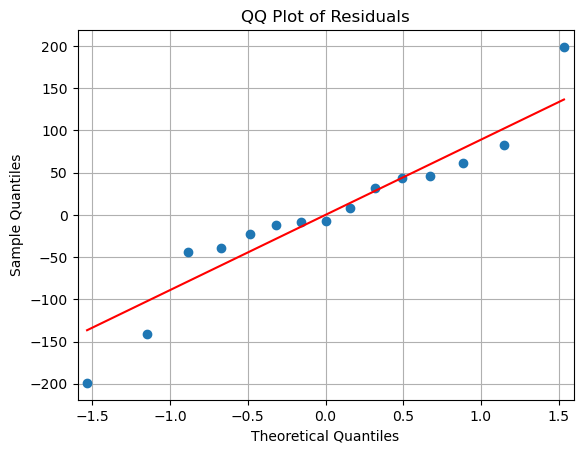

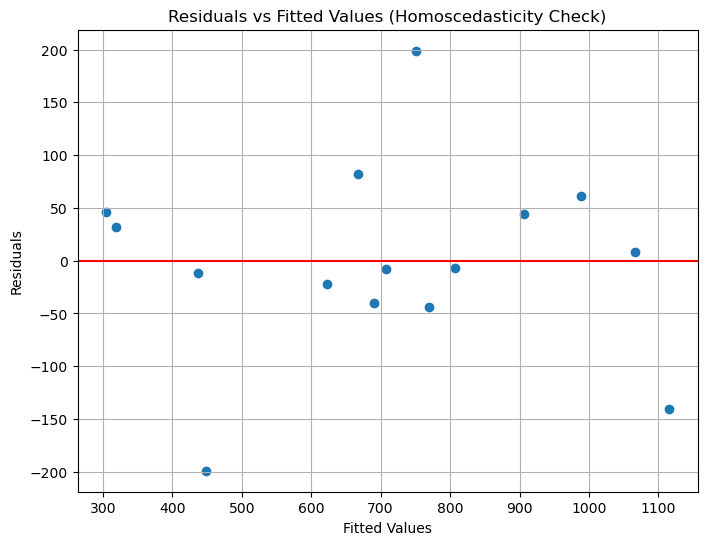

In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Fit linear regression model
X = sm.add_constant(data[['Volume', 'Cover_pb']])
multilinear_model = sm.OLS(data['Weight'], X).fit()

# Get residuals
residuals = multilinear_model.resid

# Plot residuals vs fitted values to check for independence
plt.figure(figsize=(8, 6))
plt.scatter(multilinear_model.fittedvalues, residuals)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=10)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot QQ plot of residuals
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.grid(True)
plt.show()

# Check homoscedasticity using predicted values and residuals
plt.figure(figsize=(8, 6))
plt.scatter(multilinear_model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted Values (Homoscedasticity Check)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = multilinear_model.resid



# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)

# Print p-value
print("Shapiro-Wilk test p-value:", shapiro_test[1])


Shapiro-Wilk test p-value: 0.4072265625


Basándonos en la prueba de hipótesis para la significancia global del modelo, planteamos las siguientes hipótesis:

- **Hipótesis nula (H0)**: Todos los coeficientes de regresión son iguales a cero. En otras palabras, el modelo no tiene capacidad predictiva y no es significativo.

- **Hipótesis alternativa (H1)**: Al menos uno de los coeficientes de regresión es diferente de cero. Esto implica que el modelo es significativo y tiene capacidad predictiva.

Dado que el valor p asociado al modelo en general no se proporciona directamente en el resumen del modelo, podemos inferir la significancia global del modelo a partir de la significancia de al menos una de las variables incluidas en él. En este caso, la variable 'Volume' tiene un valor p de prácticamente cero (0.000) y la variable 'Cover_Pb' tiene un valor de 0.015. Esto indica que las variables independientes son significativas en el modelo. Por lo tanto, rechazamos la hipótesis nula y concluimos que el modelo en su conjunto es estadísticamente significativo.

Ahora, en cuanto a los supuestos de los errores:

**NORMALIDAD DE ERRORES**

La prueba Wilk-Shapiro indica que si:
* H0: La distribución es normal
* H1: La distribución no es normal

Entonces si tomamos un alfa de 0.05, nuevamente determinamos que `p_value > 0.05`, y por lo tanto la distribución de los errores es normal.

**INDEPENDENCIA**

Observamos que no hay un patrón claro entre los residuos y los valores predecidos por el modelo, por lo que la "regresión" que se ajusta a estos puntos sería una linea y = 0. Esto implica que se cumple el supuesto de linealidad. Así mismo, la estadística de Durbin-Watson indica que las variables son independientes.

**HOMOCEDASTICIDAD**

Observamos que no hay un patrón claro entre la varianza de los datos con los valores predecidos por el modelo. Esto implica que la varianza es constante y por lo tanto se cumple el supuesto de homocedasticidad.

**LINEALIDAD**
La relación entre variables independientes y variable dependiente muestran una tendencia de línea, por lo que se puede asumir que la relación modelada es lineal.


## Cuando no se cumplen las Suposiciones...

Cuando los supuestos del modelo de regresión lineal no se cumplen, la regresión obtenida no tiene fundamentos estadísticos para garantizar una modelación "correcta". En estos casos, se puede:

1. **Ajustar la escala de las variables**: Se puedan aplicar transformaciones a las variables para mejorar la adecuación del modelo. Esto podría incluir transformaciones como logaritmos, raíces cuadradas o recíprocas.

2. **Aplicar otras regresiones**: Si se detecta una relación no lineal entre las variables, se puede considerar modelos de regresión no lineal, i.e. modelos polinomiales o modelos de regresión no paramétricos.

3. **Eliminar o añadir variables**: Es posible que las variables seleccionadas no tengan una buena relación entre si, por lo que sería ideal remover aquellas que no sean significativas, o en cambio agregar variables significativas al modelo.

# Parte III
## Backward Elimination
1. Comienzas con un modelo de regresión lineal que incluye todas las variables, se calcula la estadística R^2 ajustada.

2. Se calculan todos los posibles modelos en los que se se consideran todas las variables excepto una.

3. Se compara con el R^2 ajustado correspondiente a los nuevos modelos.

4. Se selecciona como nuevo modelo actual aquel que tenga el mayor R^2 ajustado, siendo mayor que la estadística del modelo previo.

5. Se repite a partir del paso dos, generando todos los posibles modelos a excepcion de alguna de las variables.

6. Detener la busqueda cuando los modelos generados no tengan una R^2 ajustada mayor que el modelo previo a los generados.

## Forward Selection
1. Comienzas generando todos los posibles modelos de una sola variable independiente. 

2. Se comparan los R^2 ajustados correspondientes a cada modelo.

3. Se selecciona como nuevo modelo actual aquel que tenga el mayor R^2 ajustado.

4. Se repite a partir del paso dos, generando todos los posibles modelos, ahora agregando una nueva variable.

5. Se selecciona como nuevo modelo actual aquel que tenga el mayor R^2 ajustado, siendo mayor que la estadística del modelo previo.

6. Detener la busqueda cuando los modelos generados no tengan una R^2 ajustada mayor que el modelo previo a los generados.